In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import math 
import sys

In [33]:
writer_director = pd.read_csv('databases/rt_movie_clean.csv')
movie_budgets = pd.read_csv('databases/movie_budgets_clean.csv')
top_producers = pd.read_csv('databases/top_producers_intl.csv', encoding='cp1252')

In [34]:
writer_director.head()

,Unnamed: 0,id,synopsis,rating,genre,director,writer,theater_date
0,0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971"
1,1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012"
2,2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996"
3,3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994"
4,4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN


In [35]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [36]:
writer_director_roi = writer_director.merge(movie_budgets, left_on='theater_date', right_on='release_date', how='inner')

In [37]:
writer_director_roi.head()

,Unnamed: 0,id_x,synopsis,rating,genre,director,writer,theater_date,id_y,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",71,"Oct 9, 1971",The French Connection,2200000,41158757,41158757
1,1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",81,"Aug 17, 2012",The Expendables 2,100000000,85028192,311979256
2,1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",89,"Aug 17, 2012",ParaNorman,60000000,56003051,108119662
3,1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",96,"Aug 17, 2012",Sparkle,10000000,24397469,24660323
4,1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",4,"Aug 17, 2012",The Awakening,4900000,95933,6924321


In [38]:
writer_director_roi['roi'] = (writer_director_roi['worldwide_gross']/writer_director_roi['production_budget']) -1

In [39]:
writer_director_roi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 0 to 2010
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2011 non-null   int64  
 1   id_x               2011 non-null   int64  
 2   synopsis           2010 non-null   object 
 3   rating             2011 non-null   object 
 4   genre              2011 non-null   object 
 5   director           1777 non-null   object 
 6   writer             1660 non-null   object 
 7   theater_date       2011 non-null   object 
 8   id_y               2011 non-null   int64  
 9   release_date       2011 non-null   object 
 10  movie              2011 non-null   object 
 11  production_budget  2011 non-null   int64  
 12  domestic_gross     2011 non-null   int64  
 13  worldwide_gross    2011 non-null   int64  
 14  roi                2011 non-null   float64
dtypes: float64(1), int64(6), object(8)
memory usage: 251.4+ KB


In [52]:
duplicate_dates = writer_director_roi.release_date.value_counts(normalize= False)
pd.dataframe(duplicate_dates)

AttributeError: module 'pandas' has no attribute 'dataframe'

In [41]:
writer_director_roi_duplicates = writer_director_roi.merge(duplicate_dates, on= 'release_date', how='inner')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [42]:
top_producers = top_producers[0:15]
top_producers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           15 non-null     int64 
 1   name           15 non-null     object
 2   interantional  15 non-null     int64 
 3   movies         15 non-null     int64 
 4   average        15 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 728.0+ bytes


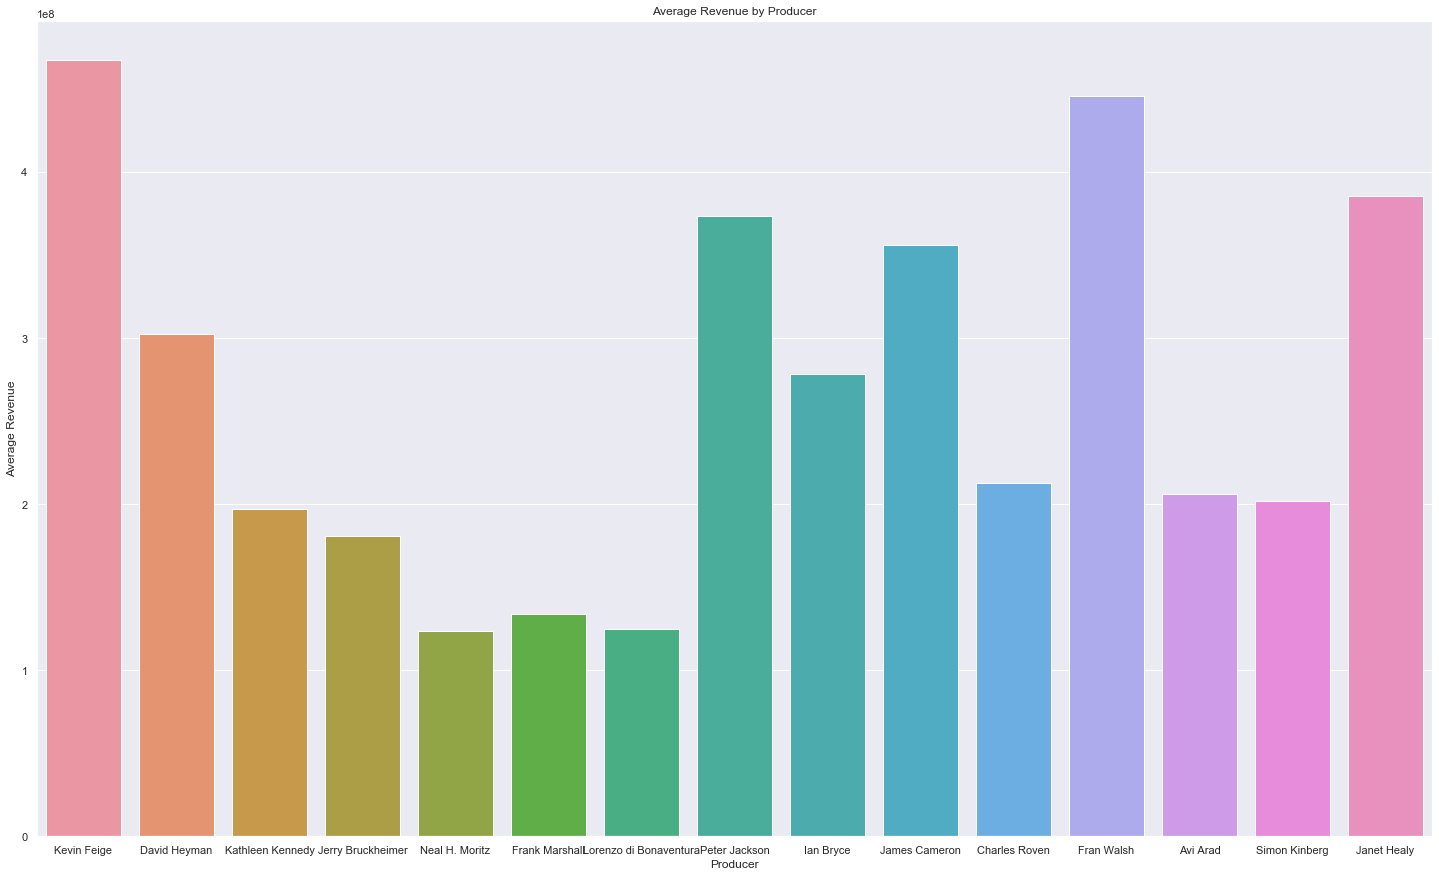

In [48]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(25,15)})


axis= sns.barplot(x='name', y= 'average', data=top_producers);
axis= axis.set(xlabel='Producer', ylabel='Average Revenue',)
plt.title('Average Revenue by Producer')
plt.show()
